9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.4453 - loss: 0.8571 - val_accuracy: 0.1500 - val_loss: 3.2990
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9734 - loss: 0.1210 - val_accuracy: 0.1500 - val_loss: 3.7678
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.9937 - loss: 0.0411 - val_accuracy: 0.1500 - val_loss: 4.8246
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.1500 - val_loss: 5.9497
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.1500 - val_loss: 5.5599


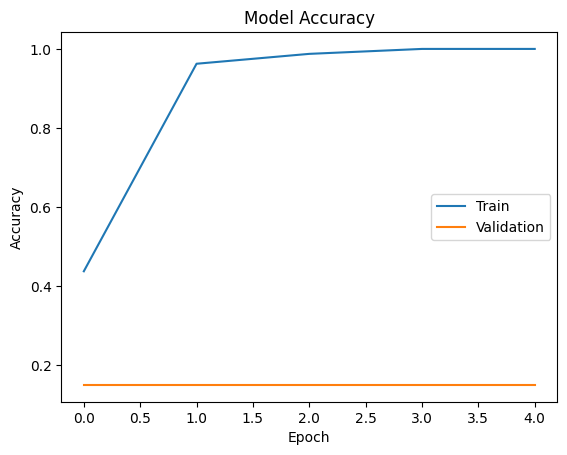

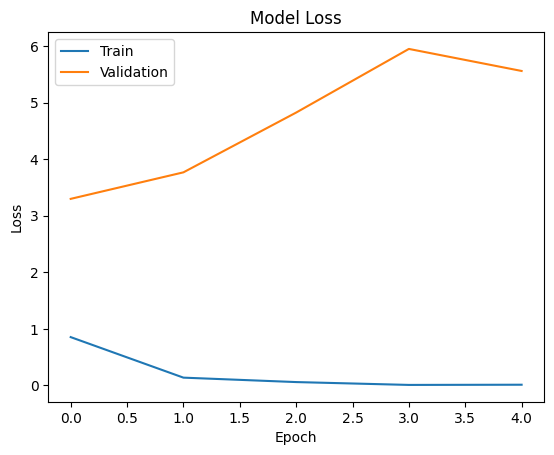

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load base model
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(224,224,3))

x = GlobalAveragePooling2D()(base_model.output)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Create better dummy dataset
X_dummy = np.random.rand(100,224,224,3)
y_dummy = np.random.randint(0,2,100)

# Train for more epochs
history = model.fit(X_dummy, y_dummy,
                    epochs=5,
                    validation_split=0.2)

# Plot Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

# Plot Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()